# IRAT Figures - Predictions at IRAT Time 

In [53]:
# basic imports
import os 
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300

def save_fig(filename, AXIS=False):
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True) 
    return

In [54]:
df = pd.read_csv('results/irat_average_qdistances_filled.csv')

# filter by positive average qdistances
df = df[(df['HA Average Qdistance'] > 0) & (df['NA Average Qdistance'] > 0)]
df.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean
Potential Emergence Estimate,1.000000,0.801516,0.117317,0.122822,-0.357059,-0.697325,-0.706604,-0.703703
Potential Impact Estimate,0.801516,1.000000,-0.256979,-0.254024,0.004992,-0.562500,-0.451331,-0.437505
HA Qnet Sample,0.117317,-0.256979,1.000000,0.999838,-0.465577,-0.158515,-0.315155,-0.335440
NA Qnet Sample,0.122822,-0.254024,0.999838,1.000000,-0.470155,-0.165806,-0.322818,-0.343628
HA Average Qdistance,-0.357059,0.004992,-0.465577,-0.470155,1.000000,0.289746,0.635994,0.675846
NA Average Qdistance,-0.697325,-0.562500,-0.158515,-0.165806,0.289746,1.000000,0.922820,0.860529
Both Average Qdistance,-0.706604,-0.451331,-0.315155,-0.322818,0.635994,0.922820,1.000000,0.964927
Geometric Mean,-0.703703,-0.437505,-0.335440,-0.343628,0.675846,0.860529,0.964927,1.000000


## Arithmetic Mean
- Uses arithmetic mean of HA and NA average qdistance vs IRAT score

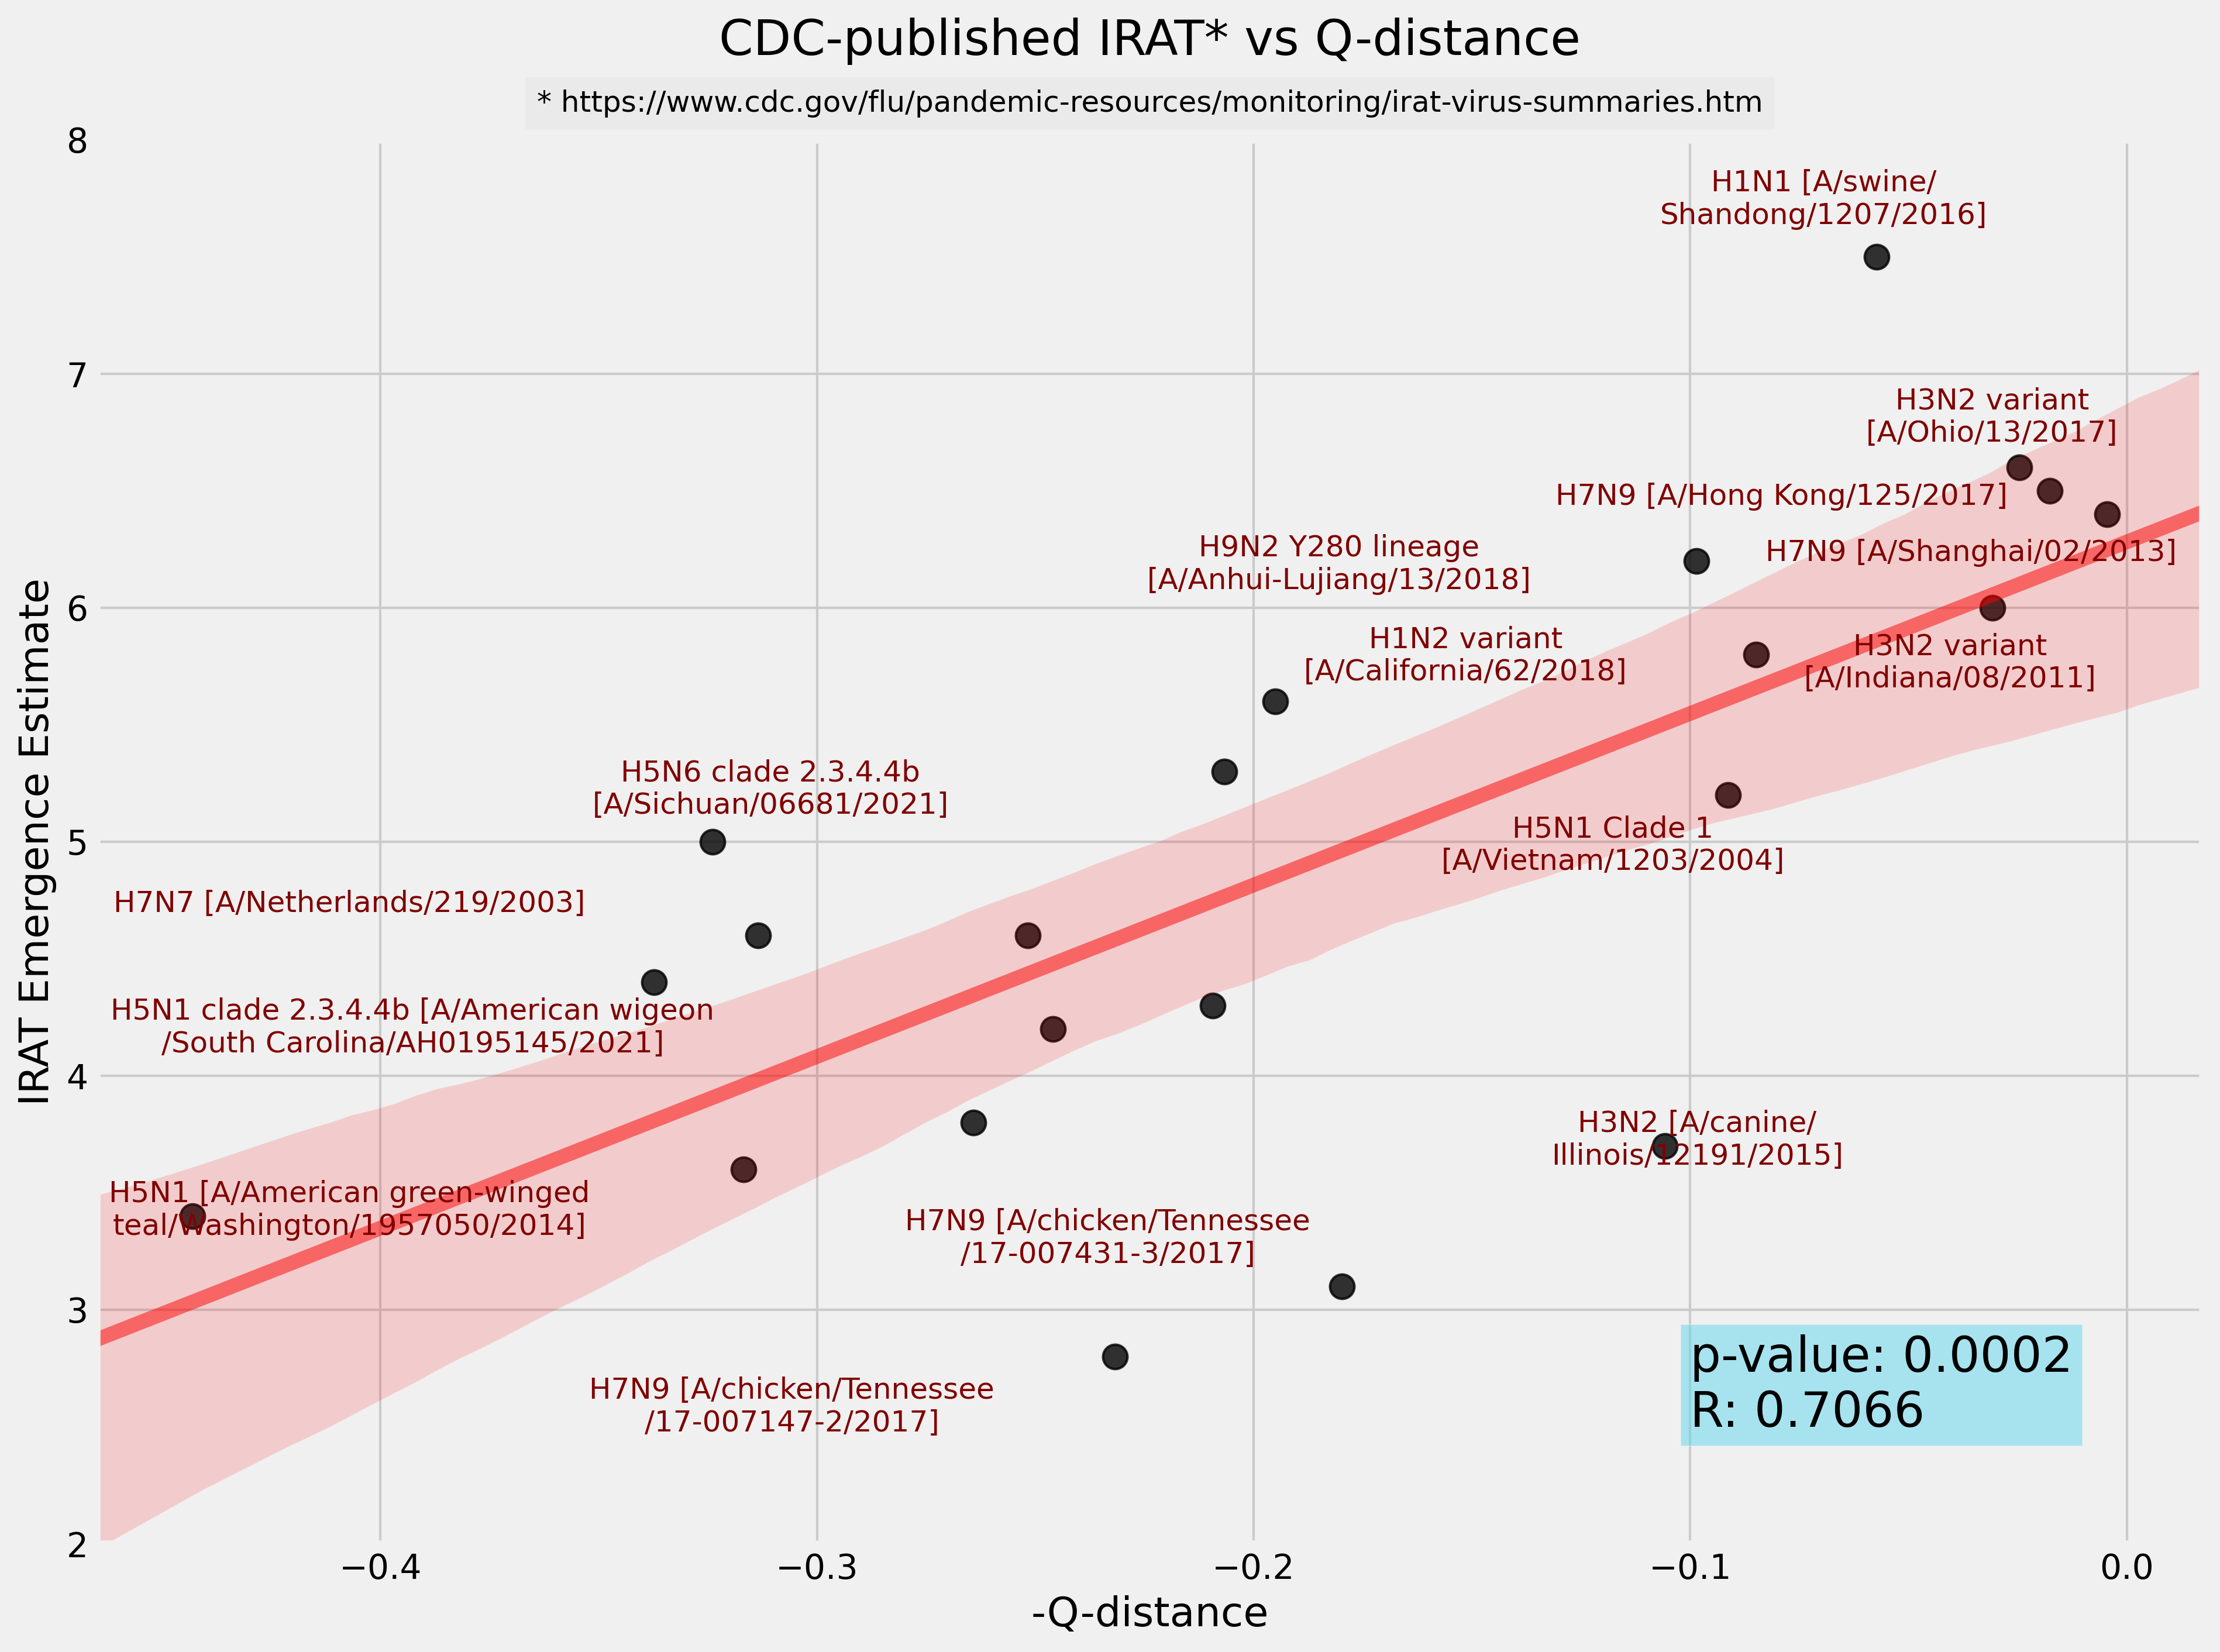

In [55]:
X = df['Both Average Qdistance']
Y = df['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.22, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.76, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.32, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.72, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.65, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.59, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.89, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.8, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined_arithmetic_filled',AXIS=True)

In [56]:
coords_df = df[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.231788,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.179693,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.443048,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.316856,3.6
17,A/canine/Illinois/12191/2015,H3N2,0.105761,3.7
16,A/Northern pintail/Washington/40964/2014,H5N2,0.264187,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.245919,4.2
14,A/Jiangxi-Donghu/346/2013,H10N8,0.209373,4.3
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.337368,4.4
12,A/Netherlands/219/2003,H7N7,0.313455,4.6


## Geometric Mean
- Uses geometric mean of HA and NA average qdistance vs IRAT score

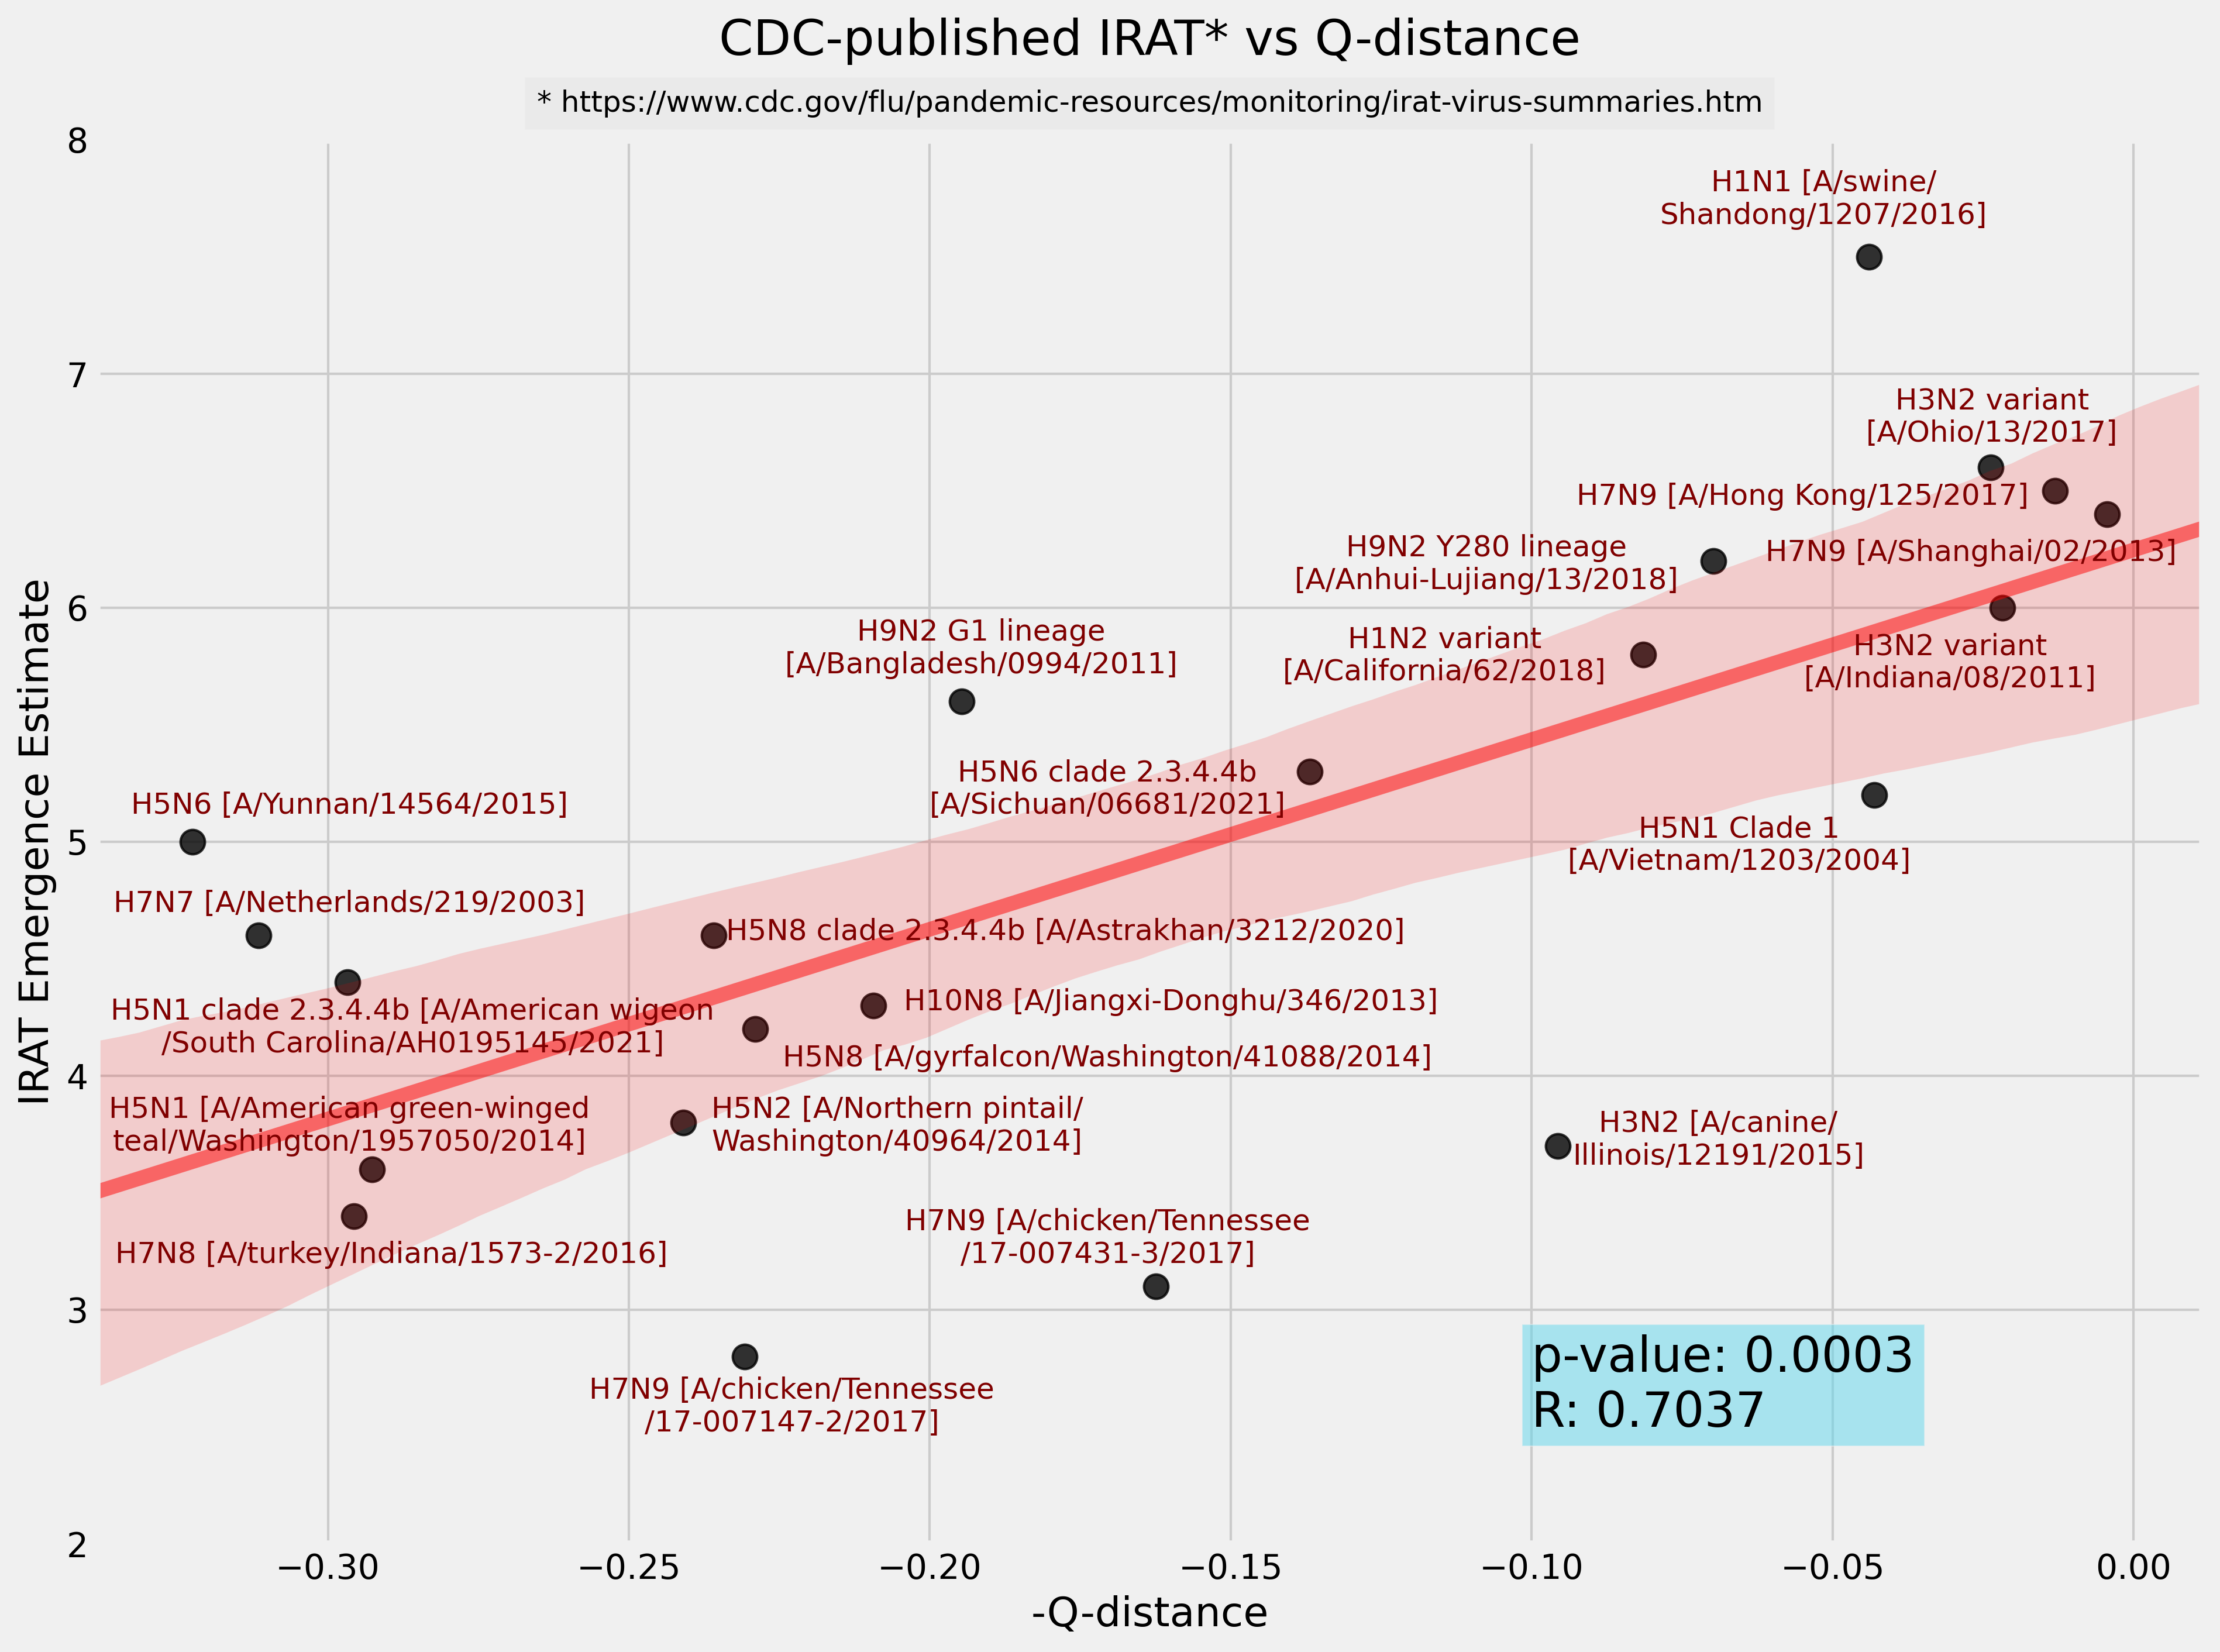

In [65]:
X = df['Geometric Mean']
Y = df['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.14, 0.20, "H7N8 [A/turkey/Indiana/1573-2/2016]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.28, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.77, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.38, 0.28, "H5N2 [A/Northern pintail/\nWashington/40964/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.34, "H5N8 [A/gyrfalcon/Washington/41088/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.51, 0.38, "H10N8 [A/Jiangxi-Donghu/346/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.46, 0.43, "H5N8 clade 2.3.4.4b [A/Astrakhan/3212/2020]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.52, "H5N6 [A/Yunnan/14564/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.78, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.42, 0.62, "H9N2 G1 lineage\n[A/Bangladesh/0994/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.64, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.66, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.89, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.81, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined_geometric_filled',AXIS=True)

In [58]:
coords_df = df[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.230738,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.162405,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.295696,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.292691,3.6
17,A/canine/Illinois/12191/2015,H3N2,0.095664,3.7
16,A/Northern pintail/Washington/40964/2014,H5N2,0.240980,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.228980,4.2
14,A/Jiangxi-Donghu/346/2013,H10N8,0.209372,4.3
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.296734,4.4
12,A/Netherlands/219/2003,H7N7,0.311533,4.6


## H1 and H3
- These strains have a lot more data available than the H5-, H7, and H9- strains

In [7]:
df_h1_h3 = df[(df['Virus Type']=='H1N1')|(df['Virus Type']=='H1N2')|(df['Virus Type']=='H3N2')]
df_h1_h3.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean
Potential Emergence Estimate,1.000000,0.903205,0.047709,0.047709,0.088108,-0.895120,-0.691605,-0.711446
Potential Impact Estimate,0.903205,1.000000,-0.171067,-0.171067,0.325615,-0.638435,-0.358275,-0.364854
HA Qnet Sample,0.047709,-0.171067,1.000000,1.000000,-0.657303,-0.063839,-0.390257,-0.466912
NA Qnet Sample,0.047709,-0.171067,1.000000,1.000000,-0.657303,-0.063839,-0.390257,-0.466912
HA Average Qdistance,0.088108,0.325615,-0.657303,-0.657303,1.000000,0.068996,0.570570,0.530860
NA Average Qdistance,-0.895120,-0.638435,-0.063839,-0.063839,0.068996,1.000000,0.858659,0.870493
Both Average Qdistance,-0.691605,-0.358275,-0.390257,-0.390257,0.570570,0.858659,1.000000,0.989340
Geometric Mean,-0.711446,-0.364854,-0.466912,-0.466912,0.530860,0.870493,0.989340,1.000000


### Arithmetic Mean

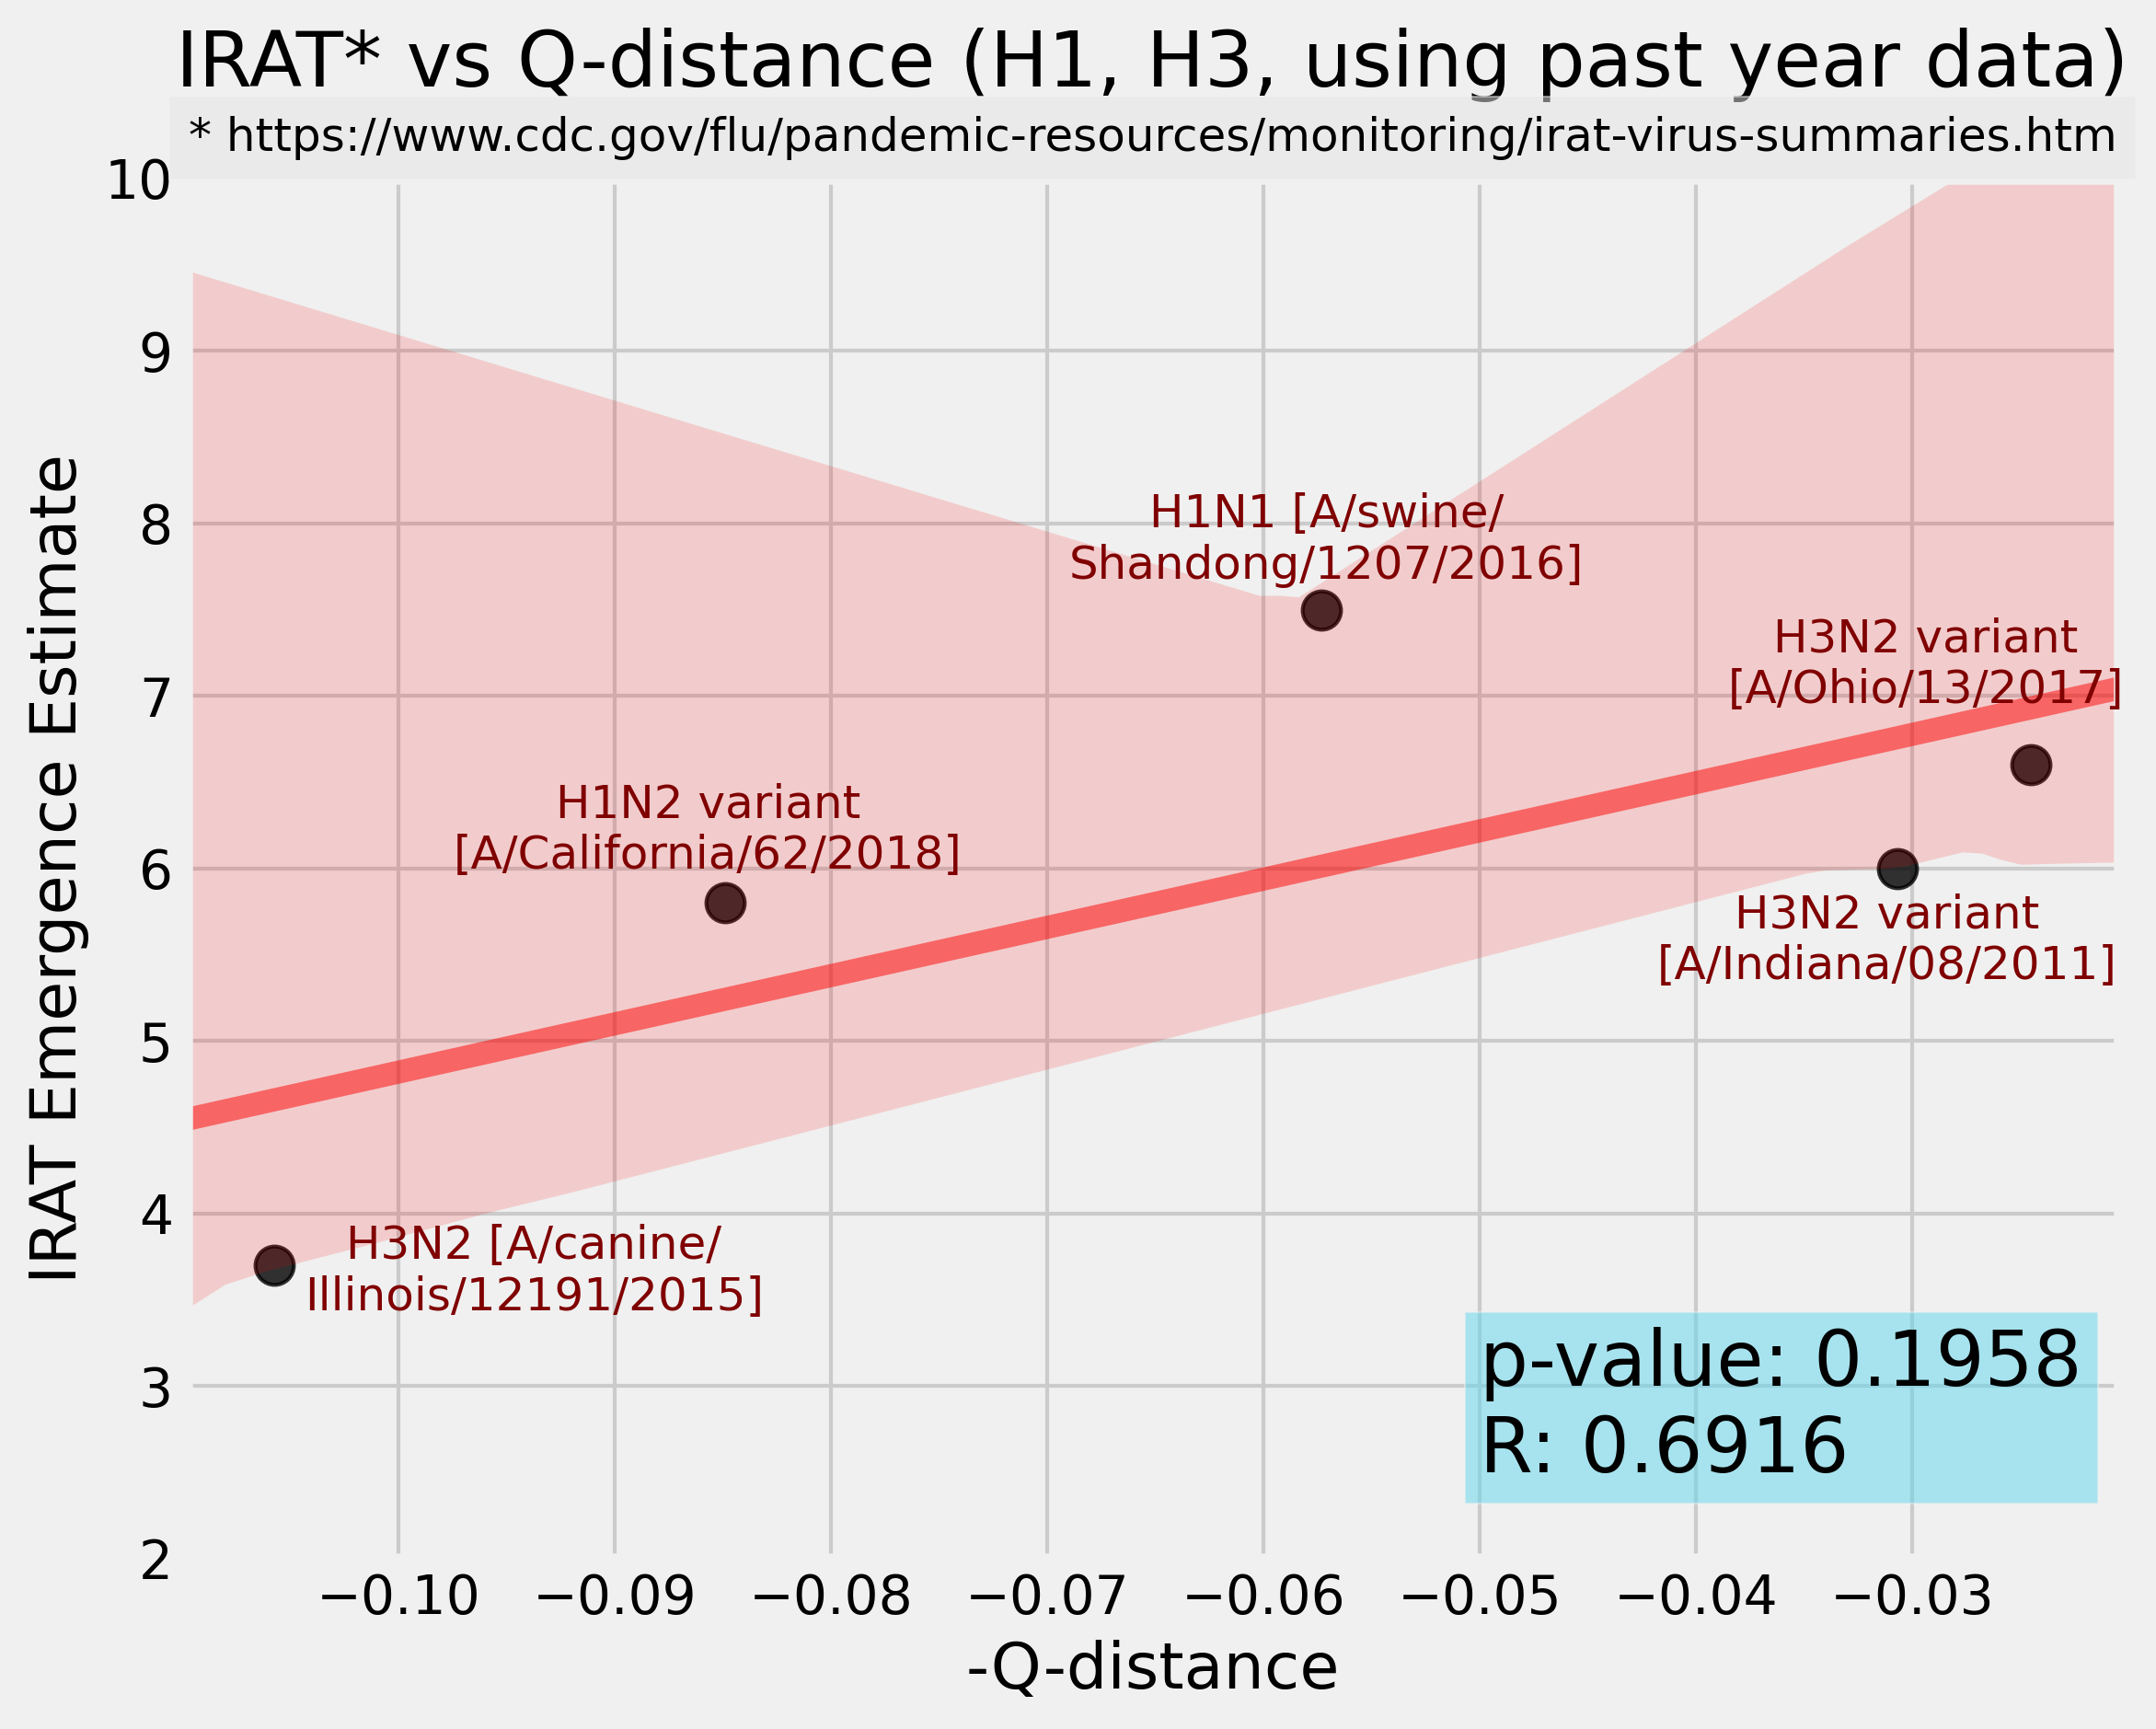

In [8]:
plt.figure(figsize = (7, 5))
X = df_h1_h3['Both Average Qdistance']
Y = df_h1_h3['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.05, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (H1, H3, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.18, 0.18, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.27, 0.5, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.42, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.62, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.59, 0.71, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h1_h3_arithmetic_filled',AXIS=True)

In [9]:
coords_df = df_h1_h3[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
17,A/canine/Illinois/12191/2015,H3N2,0.105761,3.7
6,A/California/62/2018,H1N2,0.084926,5.8
5,A/Indiana/08/2011,H3N2,0.030707,6.0
1,A/Ohio/13/2017,H3N2,0.024527,6.6
0,A/swine/Shandong/1207/2016,H1N1,0.057332,7.5


### Geometric Mean

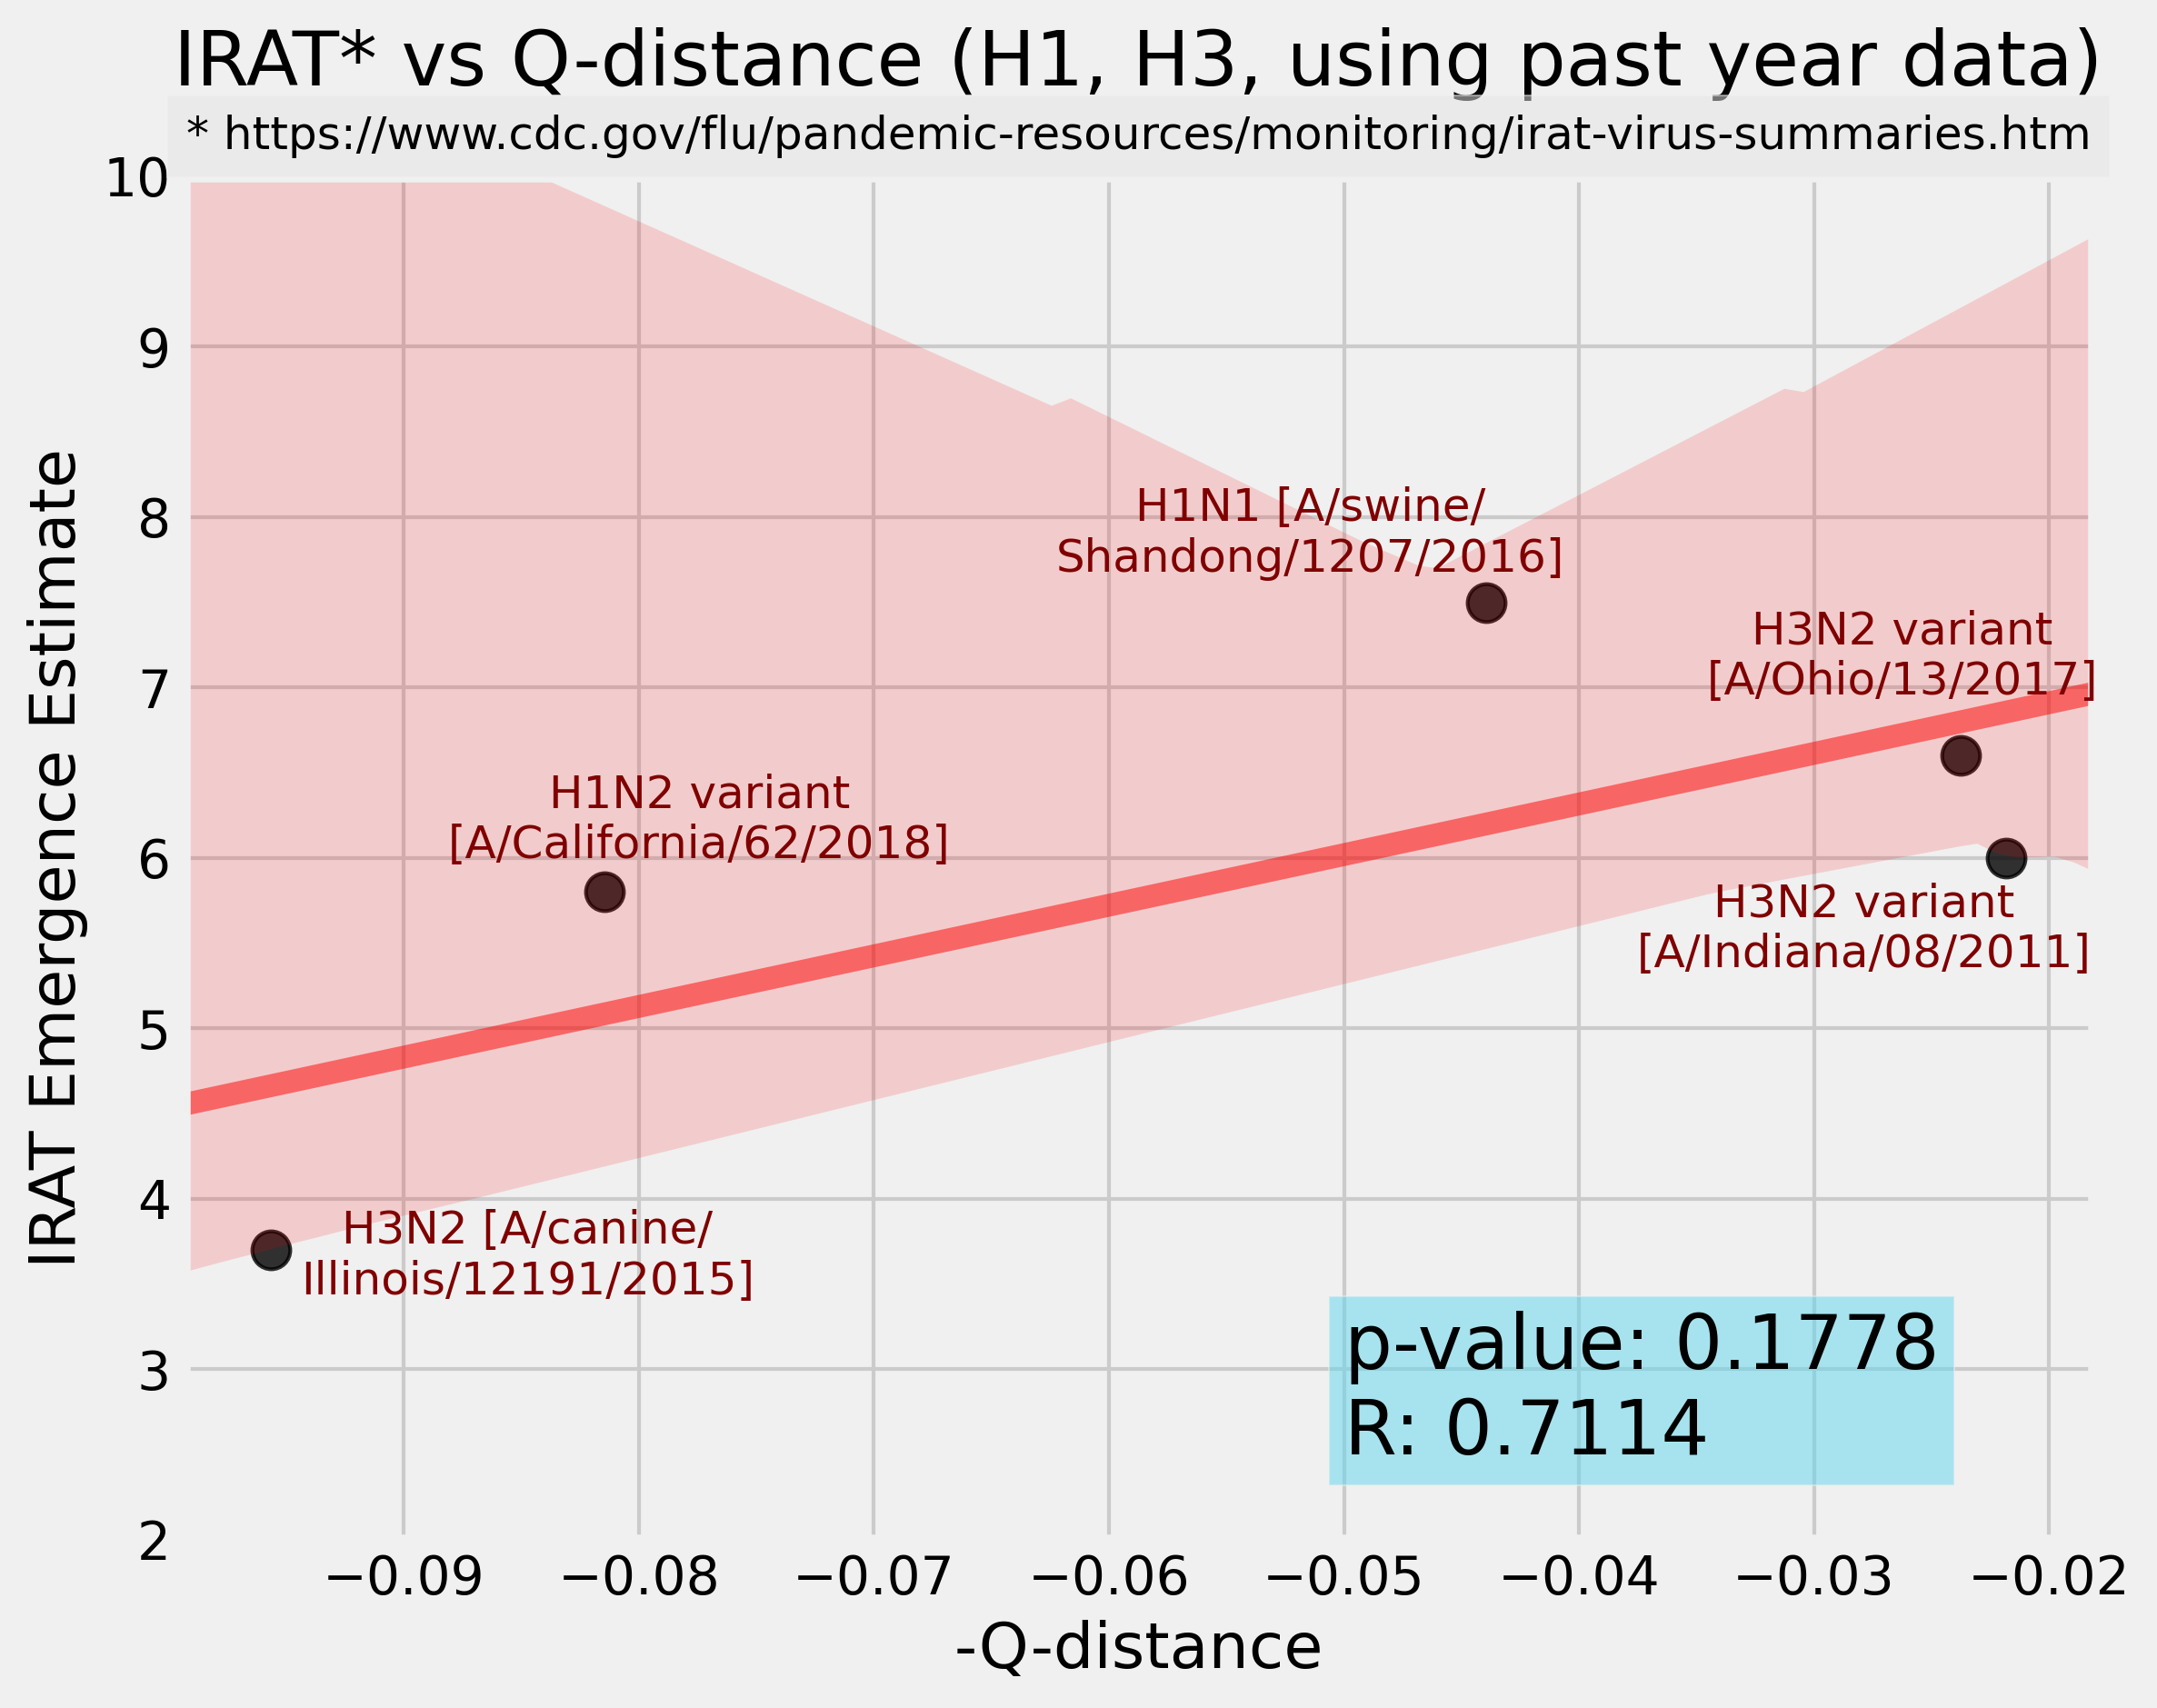

In [10]:
plt.figure(figsize = (7, 5))
X = df_h1_h3['Geometric Mean']
Y = df_h1_h3['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.05, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (H1, H3, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.18, 0.18, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.27, 0.5, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.42, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.62, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.59, 0.71, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h1_h3_geometric_filled',AXIS=True)

In [11]:
coords_df = df_h1_h3[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
17,A/canine/Illinois/12191/2015,H3N2,0.095664,3.7
6,A/California/62/2018,H1N2,0.081472,5.8
5,A/Indiana/08/2011,H3N2,0.021822,6.0
1,A/Ohio/13/2017,H3N2,0.023757,6.6
0,A/swine/Shandong/1207/2016,H1N1,0.043961,7.5


## H5, H7, and H9
- These strains have less sequence data available than the H1- and H3- strains

In [12]:
df_h5_h7_h9 = df[(df['Virus Type']!='H1N1')&(df['Virus Type']!='H1N2')&(df['Virus Type']!='H3N2')]
df_h5_h7_h9.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean
Potential Emergence Estimate,1.000000,0.937725,-0.580955,-0.577519,-0.281179,-0.668617,-0.689668,-0.688303
Potential Impact Estimate,0.937725,1.000000,-0.517965,-0.516259,-0.047280,-0.680114,-0.598894,-0.581250
HA Qnet Sample,-0.580955,-0.517965,1.000000,0.999208,-0.195845,0.391849,0.251373,0.243709
NA Qnet Sample,-0.577519,-0.516259,0.999208,1.000000,-0.206824,0.383912,0.240114,0.229273
HA Average Qdistance,-0.281179,-0.047280,-0.195845,-0.206824,1.000000,0.128959,0.535649,0.580714
NA Average Qdistance,-0.668617,-0.680114,0.391849,0.383912,0.128959,1.000000,0.906401,0.830075
Both Average Qdistance,-0.689668,-0.598894,0.251373,0.240114,0.535649,0.906401,1.000000,0.952810
Geometric Mean,-0.688303,-0.581250,0.243709,0.229273,0.580714,0.830075,0.952810,1.000000


### Arithmetic Mean

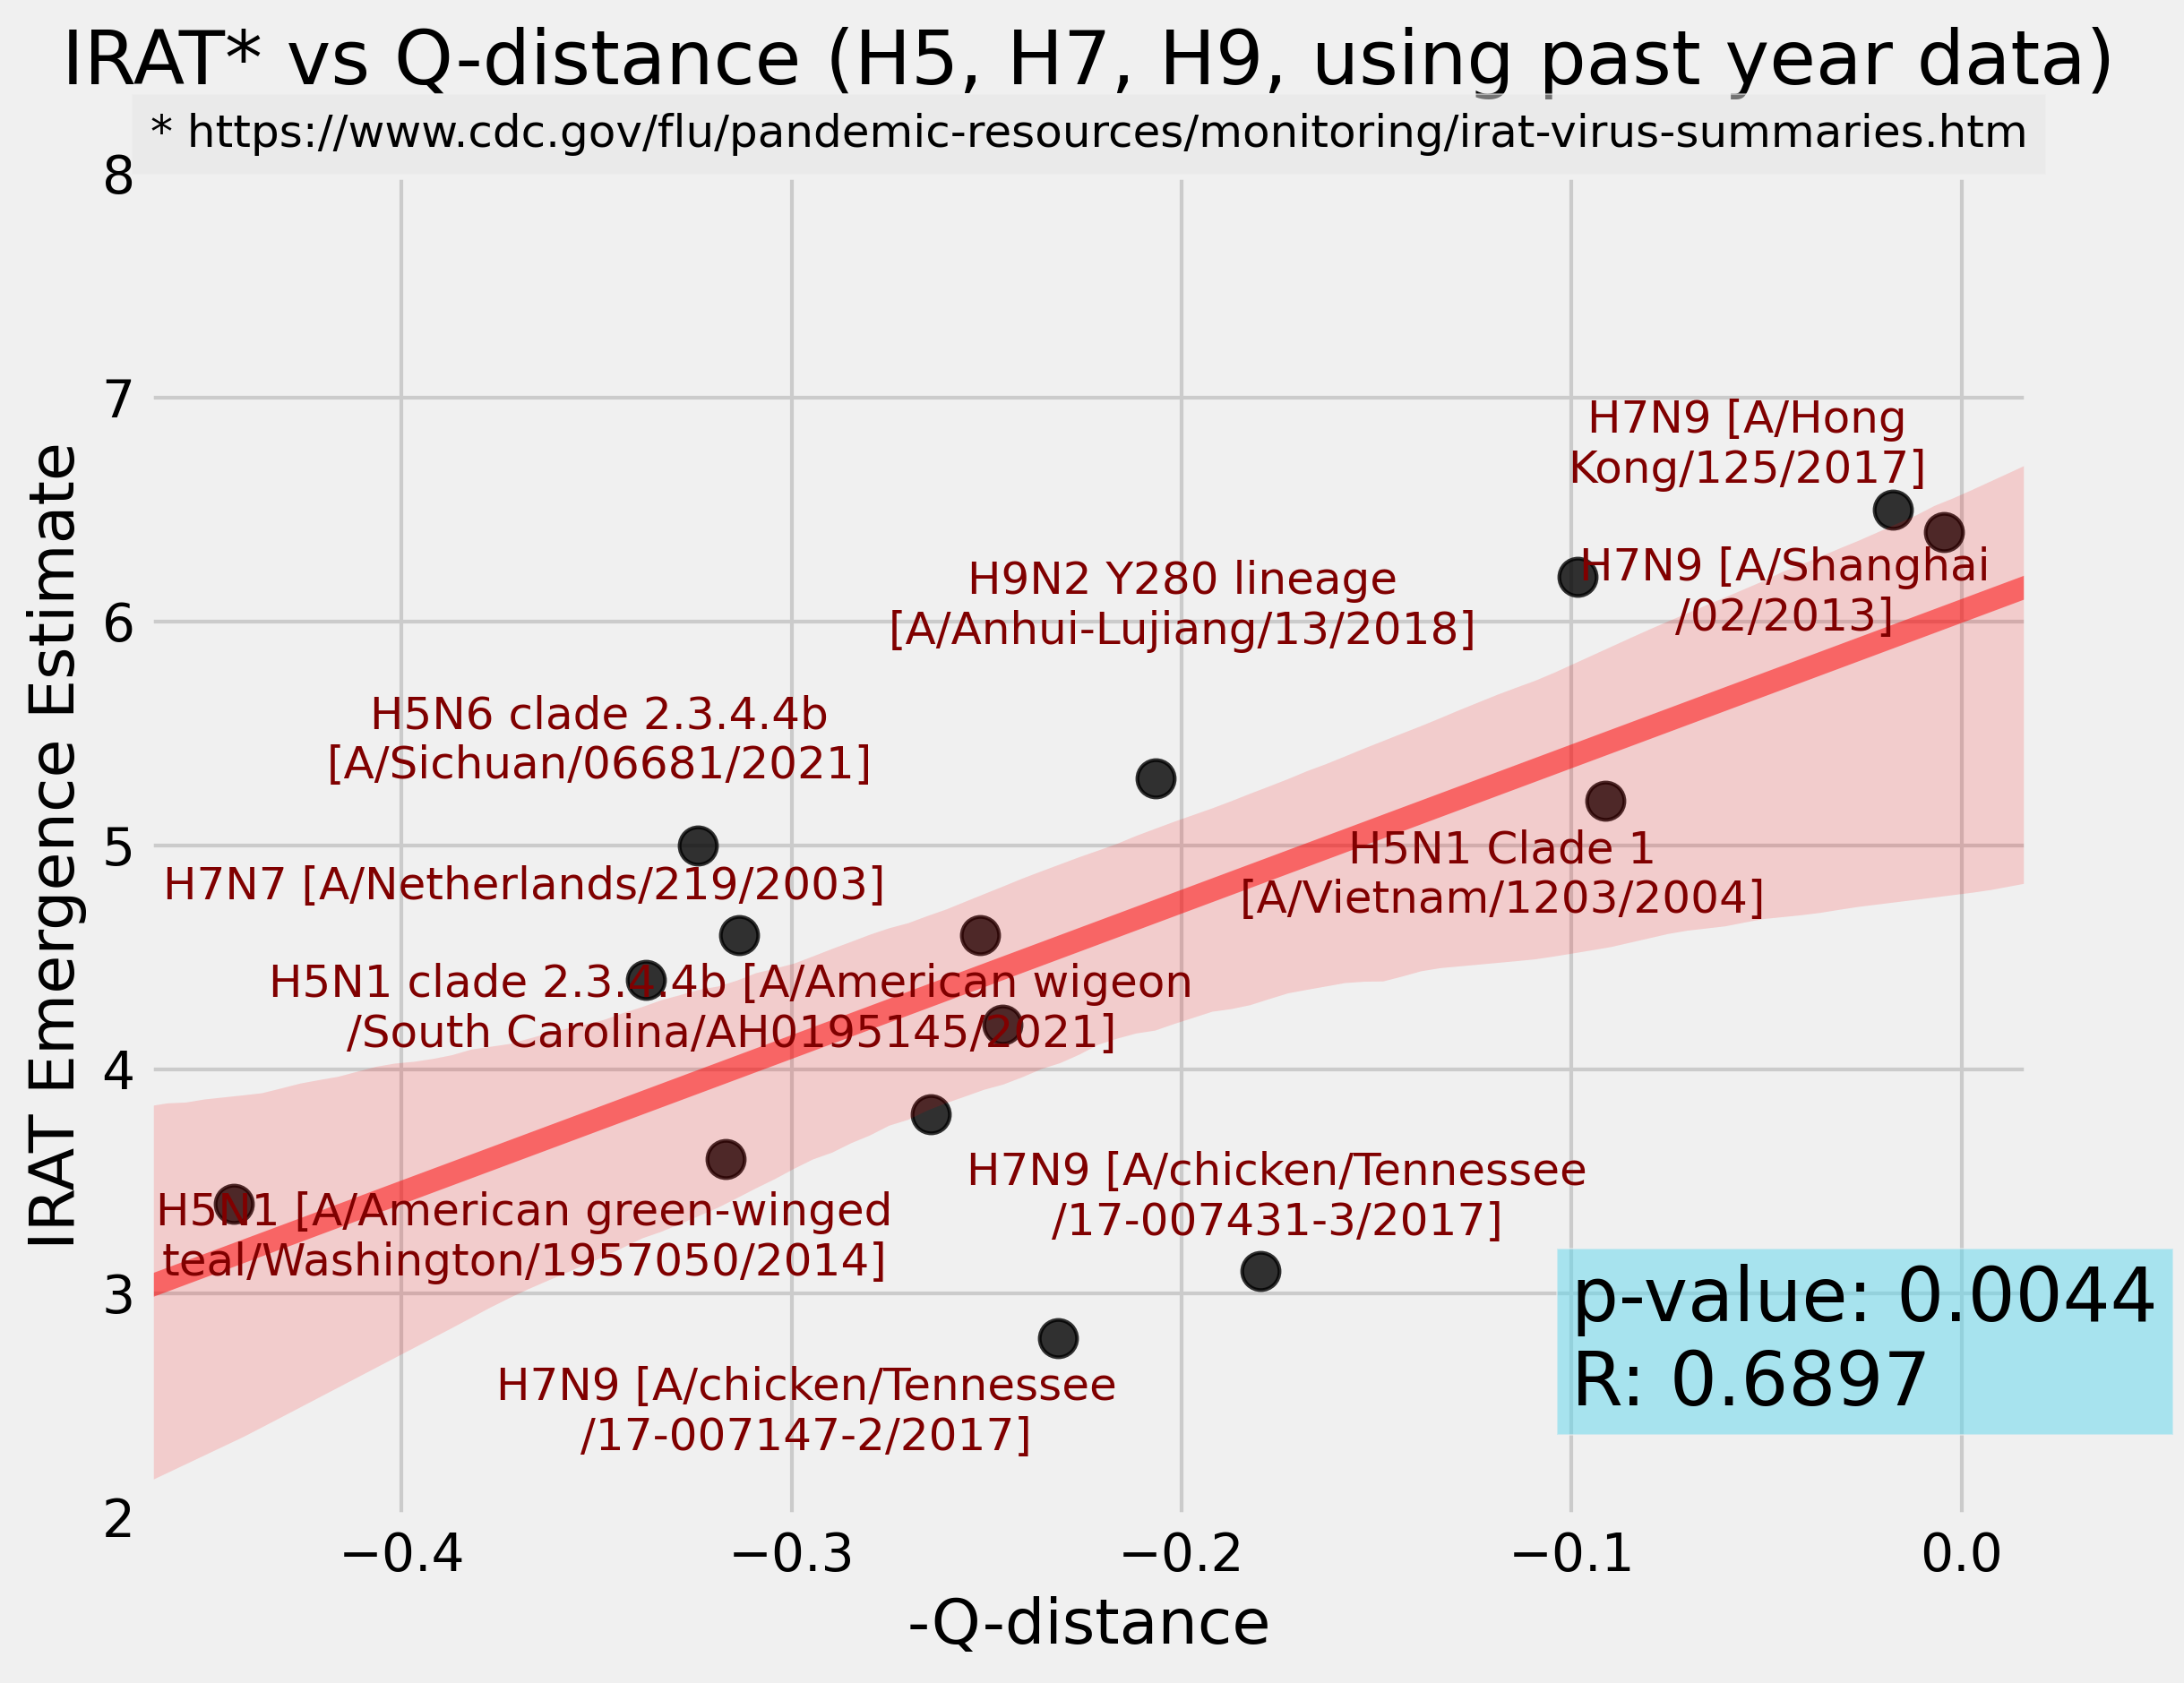

In [13]:
plt.figure(figsize = (7, 5))
X = df_h5_h7_h9['Both Average Qdistance']
Y = df_h5_h7_h9['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('IRAT* vs Q-distance (H5, H7, H9, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.35, 0.05, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.6, 0.21, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.2, 0.18, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.31, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.2, 0.46, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.24, 0.55, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.72, 0.45, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.55, 0.65, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.87, 0.66, "H7N9 [A/Shanghai\n/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.85, 0.77, "H7N9 [A/Hong\nKong/125/2017]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h5_h7_h9_arithmetic_filled',AXIS=True)

In [14]:
coords_df = df_h5_h7_h9[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.231788,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.179693,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.443048,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.316856,3.6
16,A/Northern pintail/Washington/40964/2014,H5N2,0.264187,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.245919,4.2
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.337368,4.4
11,A/Astrakhan/3212/2020,H5N8,0.251738,4.6
12,A/Netherlands/219/2003,H7N7,0.313455,4.6
10,A/Yunnan/14564/2015,H5N6,0.323934,5.0


### Geometric Mean

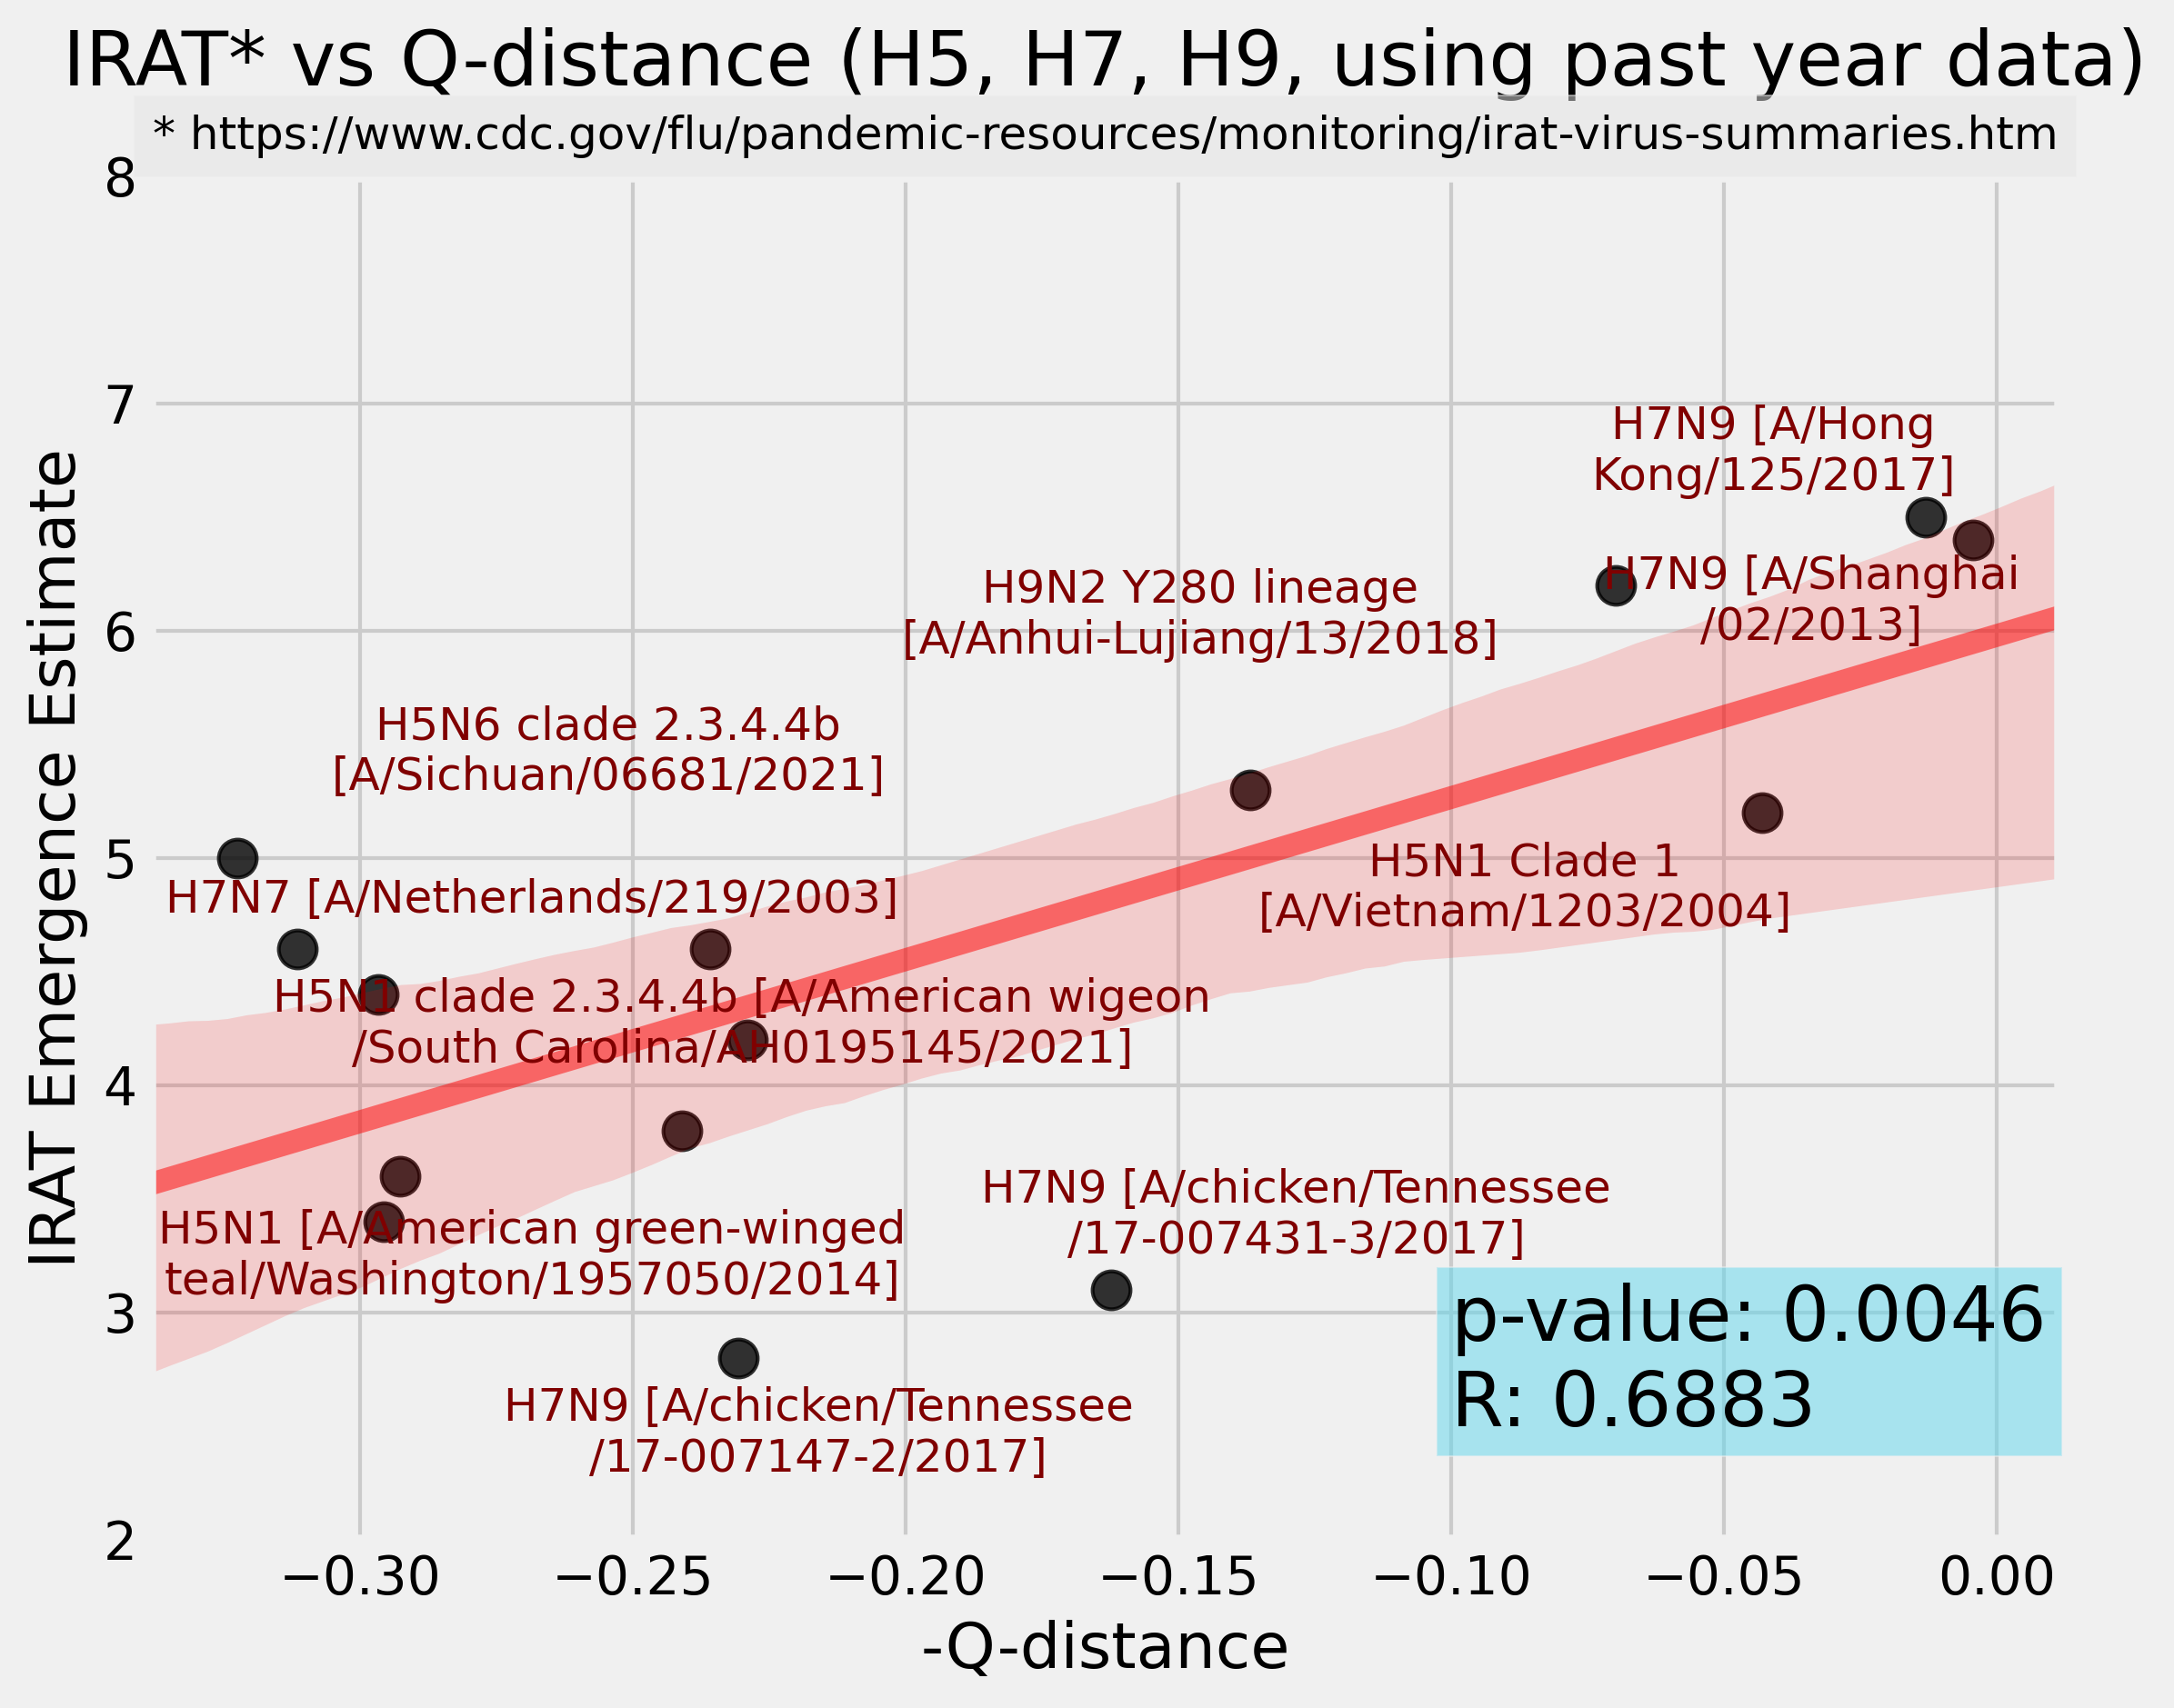

In [15]:
plt.figure(figsize = (7, 5))
X = df_h5_h7_h9['Geometric Mean']
Y = df_h5_h7_h9['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('IRAT* vs Q-distance (H5, H7, H9, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.35, 0.05, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.6, 0.21, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.2, 0.18, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.31, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.2, 0.46, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.24, 0.55, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.72, 0.45, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.55, 0.65, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.87, 0.66, "H7N9 [A/Shanghai\n/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.85, 0.77, "H7N9 [A/Hong\nKong/125/2017]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h5_h7_h9_geometric_filled',AXIS=True)

In [16]:
coords_df = df_h5_h7_h9[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.230738,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.162405,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.295696,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.292691,3.6
16,A/Northern pintail/Washington/40964/2014,H5N2,0.240980,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.228980,4.2
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.296734,4.4
11,A/Astrakhan/3212/2020,H5N8,0.235901,4.6
12,A/Netherlands/219/2003,H7N7,0.311533,4.6
10,A/Yunnan/14564/2015,H5N6,0.322508,5.0
